# Nightlight Summary Statistics Model

## Imports

In [1]:
import os
import sys
sys.path.insert(0, '../utils')
import model_utils
import data_utils

import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
%load_ext autoreload
%autoreload 2

/home/issa/.local/lib/python3.5/site-packages/sklearn/utils/fixes.py:313: FutureWarning: numpy not_equal will not check object identity in the future. The comparison did not return the same result as suggested by the identity (`is`)) and will change.
  _nan_object_mask = _nan_object_array != _nan_object_array


## File Locations

In [2]:
# Google Cloud Storage
bucket_name = 'tm-geospatial'
directory = 'poverty-prediction-datasets'

# Destination paths
ntl_summary_stats_file = '../data/nightlights_summary_stats.csv'
dhs_indicators_file = '../data/dhs_indicators.csv'

## Download Datasets

In [3]:
# Download from Google Cloud Storage
data_utils.download_from_bucket('nightlights_summary_stats.csv', directory, ntl_summary_stats_file, bucket_name);
data_utils.download_from_bucket('dhs_indicators.csv', directory, dhs_indicators_file, bucket_name);

../../data/open_source/public/nightlights_summary_stats.csv successfully downloaded
../../data/open_source/private/dhs_indicators.csv successfully downloaded


## Load Datasets

In [4]:
# Load nighttime lights dataset
ntl_summary_stats = pd.read_csv(ntl_summary_stats_file, encoding="ISO-8859-1")
dhs_indicators = pd.read_csv(dhs_indicators_file)
dhs = ntl_summary_stats.merge(dhs_indicators, left_on='DHSCLUST', right_on='Cluster number')

# Define feature columns
feature_cols = ['cov', 'kurtosis', 'max', 'mean', 'median', 'min', 'skewness', 'std']

## Correlations

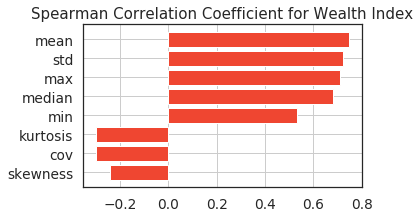

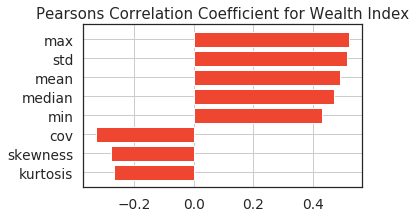

In [5]:
data_utils.plot_corr(
    data=dhs,
    features_cols=feature_cols,
    indicator = 'Wealth Index',
    figsize=(5,3)
)

## Machine Learning Pipeline

### Configuration

In [6]:
# Scoring metrics
scoring = {
    'r2': data_utils.pearsonr2,
    'rmse': data_utils.rmse
}

# Indicators of interest
indicators = [
    'Wealth Index',
    'Education completed (years)',
    'Access to electricity',
    'Access to water (minutes)'
]

### Random Forest

Socioeconomic indicator: Wealth Index
fit_time : 128.1175
[141.93688369 142.90091324 142.8868053  142.35753083  70.50519872]
train_rmse : 44211.2664
[43223.99122692 44484.42308412 45083.91960386 44225.77073738
 44038.22755218]
train_r2 : 0.6123
[0.62586304 0.60033068 0.60927245 0.60754986 0.61849967]
test_rmse : 46646.7762
[50368.18006814 45671.52862699 42799.03023485 46804.20392352
 47590.93809713]
score_time : 0.6906
[0.70963955 0.71020246 0.60908985 0.6130693  0.81088662]
test_r2 : 0.5685
[0.51337249 0.61896375 0.58443944 0.58829914 0.53731852]


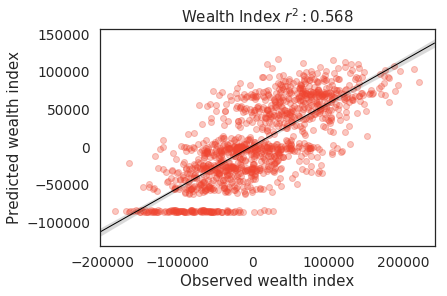

Best estimator: Pipeline(memory=None,
     steps=[('regressor', RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=4,
           max_features='log2', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=7, min_samples_split=4,
           min_weight_fraction_leaf=0.0, n_estimators=1682, n_jobs=-1,
           oob_score=False, random_state=42, verbose=0, warm_start=False))])
Socioeconomic indicator: Education completed (years)
fit_time : 129.7043
[143.83362532 142.35145426 145.75490689 144.27396321  72.30732274]
train_rmse : 1.7146
[1.71294855 1.68816068 1.70998396 1.73445314 1.72769859]
train_r2 : 0.4669
[0.4772504  0.46778571 0.47537797 0.4469129  0.46733874]
test_rmse : 1.7677
[1.76688818 1.8745259  1.78290211 1.69606782 1.71820482]
score_time : 0.7378
[0.81778574 0.43144751 0.91216826 0.71695566 0.81049085]
test_r2 : 0.4348
[0.39202958 0.4319911  0.39985141 0.52045156 0.42959074]


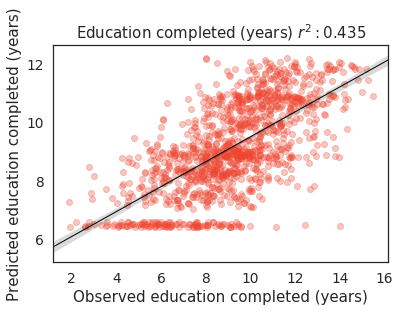

Best estimator: Pipeline(memory=None,
     steps=[('regressor', RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=3,
           max_features='log2', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=2, min_samples_split=5,
           min_weight_fraction_leaf=0.0, n_estimators=800, n_jobs=-1,
           oob_score=False, random_state=42, verbose=0, warm_start=False))])
Socioeconomic indicator: Access to electricity
fit_time : 130.3068
[144.09462333 145.3955164  145.02088404 143.96404338  73.05891299]
train_rmse : 0.1195
[0.12516479 0.12102657 0.11802166 0.11569762 0.11768178]
train_r2 : 0.3239
[0.32184921 0.32141611 0.31866932 0.3238114  0.33364588]
test_rmse : 0.1223
[0.10206867 0.11869281 0.12687713 0.13863952 0.1254047 ]
score_time : 0.7140
[0.81267476 0.8101995  0.72639251 0.41005111 0.8106401 ]
test_r2 : 0.2921
[0.26104195 0.27330308 0.3284305  0.29192671 0.305723  ]


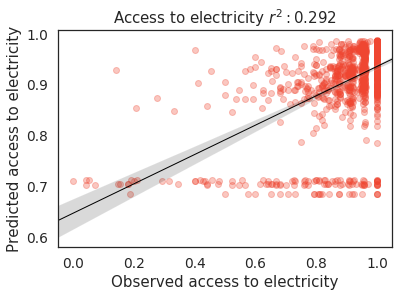

Best estimator: Pipeline(memory=None,
     steps=[('regressor', RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=6,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=8, min_samples_split=6,
           min_weight_fraction_leaf=0.0, n_estimators=1244, n_jobs=-1,
           oob_score=False, random_state=42, verbose=0, warm_start=False))])
Socioeconomic indicator: Access to water (minutes)
fit_time : 126.8828
[139.7364223  138.50384188 140.60560966 140.68309498  74.8851161 ]
train_rmse : 7.7356
[6.01088118 7.77537158 8.17327602 8.35493736 8.36368572]
train_r2 : 0.1091
[0.15273889 0.10349153 0.08549941 0.10881905 0.09510935]
test_rmse : 7.5481
[12.72139894  7.99795424  6.8262555   5.12586593  5.06897261]
score_time : 0.6250
[0.65893197 0.82938123 0.40864635 0.41471934 0.8131721 ]
test_r2 : 0.0580
[0.0649379  0.06679876 0.01605301 0.02240975 0.1197966 ]


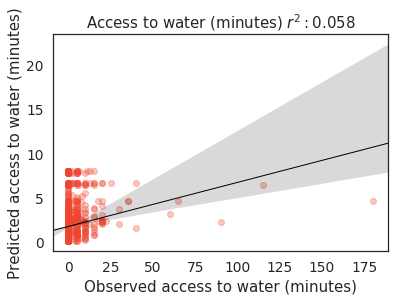

Best estimator: Pipeline(memory=None,
     steps=[('regressor', RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=3,
           max_features='log2', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=3, min_samples_split=5,
           min_weight_fraction_leaf=0.0, n_estimators=1790, n_jobs=-1,
           oob_score=False, random_state=42, verbose=0, warm_start=False))])


In [6]:
predictions = model_utils.evaluate_model(
    data=dhs,
    feature_cols=feature_cols, 
    indicator_cols=indicators, 
    scoring=scoring,
    model_type='random_forest', 
    refit='r2', 
    search_type='random', 
    n_splits=5, 
    n_iter=10
)

### XGBoost

Socioeconomic indicator: Wealth Index
fit_time : 64.6427
[76.35747027 75.32208443 76.39283061 75.18354034 19.95769238]
train_rmse : 18455.8877
[20252.14824588 17429.04873743 20742.17607937 17217.59132922
 16638.47421839]
train_r2 : 0.9363
[0.92313093 0.9422984  0.92361627 0.94374002 0.94890613]
test_rmse : 49508.5325
[52279.99610983 47707.92473818 46077.46765575 50643.84555704
 50833.42832521]
score_time : 0.0346
[0.05168653 0.0256722  0.05114055 0.02522397 0.01925135]
test_r2 : 0.5199
[0.48716437 0.57910432 0.53418984 0.5203723  0.47862923]


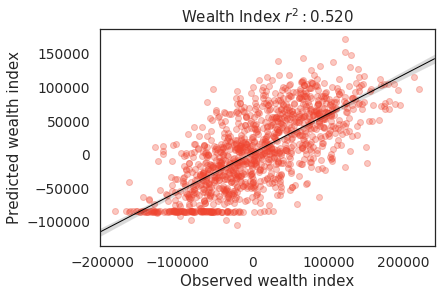

Best estimator: Pipeline(memory=None,
     steps=[('regressor', XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.9553410014550571, gamma=2.891095842056666,
       learning_rate=0.013648111706918705, max_delta_step=0, max_depth=6,
       min_child_weight=3, missing=None, n_estimators=1155, n_jobs=-1,
       nthread=None, objective='reg:linear', random_state=42, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=0.9677564361842282))])
Socioeconomic indicator: Education completed (years)
fit_time : 54.5926
[63.95643926 63.1544745  63.52451253 64.634372   17.69314408]
train_rmse : 1.0596
[1.08985079 1.03514316 0.99627414 1.07649614 1.10026133]
train_r2 : 0.8128
[0.80396035 0.81676762 0.83801489 0.80506816 0.80041941]
test_rmse : 1.8252
[1.82976017 1.9123358  1.83713251 1.80067251 1.74611781]
score_time : 0.0369
[0.03494048 0.01860619 0.06403112 0.03833938 0.02858186]
test_r2 : 0.4035
[0.36830142 0.4087

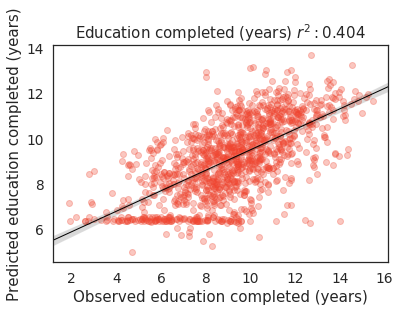

Best estimator: Pipeline(memory=None,
     steps=[('regressor', XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.8103147409178301, gamma=2.9328580472454795,
       learning_rate=0.028759278269756328, max_delta_step=0, max_depth=7,
       min_child_weight=2, missing=None, n_estimators=543, n_jobs=-1,
       nthread=None, objective='reg:linear', random_state=42, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=0.9510747302577566))])
Socioeconomic indicator: Access to electricity
fit_time : 55.9175
[65.3572216  66.10589147 64.94849253 65.25050521 17.92544365]
train_rmse : 0.1304
[0.13409178 0.13372964 0.12877361 0.1258283  0.12951586]
train_r2 : 0.2757
[0.28199021 0.27339288 0.26583994 0.28417011 0.27315877]
test_rmse : 0.1306
[0.10282297 0.12898088 0.13767293 0.14956753 0.13400898]
score_time : 0.0094
[0.00684071 0.00853539 0.00754499 0.01921177 0.00474668]
test_r2 : 0.2593
[0.22379443 0.21541864 0

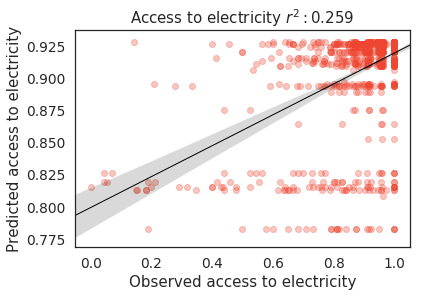

Best estimator: Pipeline(memory=None,
     steps=[('regressor', XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.8126748857919832, gamma=1.769155576570879,
       learning_rate=0.14166461142567582, max_delta_step=0, max_depth=5,
       min_child_weight=4, missing=None, n_estimators=1596, n_jobs=-1,
       nthread=None, objective='reg:linear', random_state=42, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=0.9779875545857624))])
Socioeconomic indicator: Access to water (minutes)
fit_time : 56.6451
[66.57360315 66.25971627 65.84231019 66.51594472 18.0340879 ]
train_rmse : 6.5053
[4.23729858 6.46033168 7.30547909 7.32185888 7.20139432]
train_r2 : 0.3732
[0.57949224 0.3781522  0.26973702 0.31279117 0.32590998]
test_rmse : 7.7684
[12.87694292  8.00704323  6.98756994  5.72569268  5.24488875]
score_time : 0.0253
[0.04878211 0.02046776 0.02038598 0.02086568 0.01577592]
test_r2 : 0.0411
[0.02718687 0.06

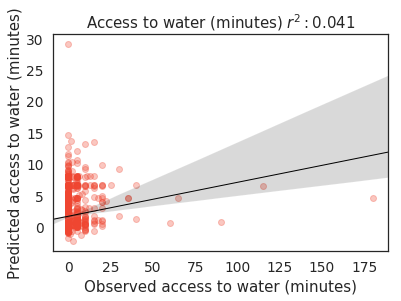

Best estimator: Pipeline(memory=None,
     steps=[('regressor', XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.7072947899294361, gamma=2.891095842056666,
       learning_rate=0.07199391201202428, max_delta_step=0, max_depth=6,
       min_child_weight=1, missing=None, n_estimators=1384, n_jobs=-1,
       nthread=None, objective='reg:linear', random_state=42, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=0.9174366429004992))])


In [7]:
predictions = model_utils.evaluate_model(
    data=dhs,
    feature_cols=feature_cols, 
    indicator_cols=indicators, 
    scoring=scoring,
    model_type='xgboost', 
    refit='r2', 
    search_type='random', 
    n_splits=5, 
    n_iter=10
)

### Lasso Regression

Socioeconomic indicator: Wealth Index
fit_time : 0.9091
[0.93470526 1.08434105 1.08536816 1.00931931 0.43180513]
train_rmse : 58931.7357
[58605.30126604 58879.74020149 59563.02554407 58505.17421725
 59105.43716706]
train_r2 : 0.3097
[0.31065152 0.2983289  0.31643954 0.31158217 0.31134271]
test_rmse : 59522.6414
[61341.91442325 59672.03977646 57002.79533742 61033.15065271
 58563.30665249]
score_time : 0.0020
[0.00177836 0.00235581 0.00225067 0.00192952 0.00171423]
test_r2 : 0.2988
[0.28366014 0.34585649 0.26527583 0.29617549 0.30286331]


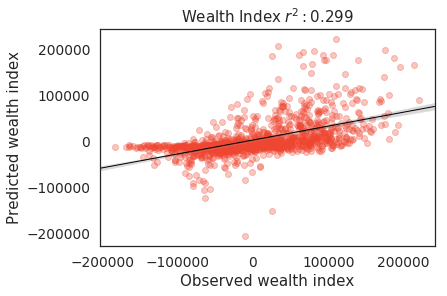

Best estimator: Pipeline(memory=None,
     steps=[('regressor', Lasso(alpha=1.49816047538945, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=42,
   selection='cyclic', tol=0.0001, warm_start=False))])
Socioeconomic indicator: Education completed (years)
fit_time : 0.3194
[0.3164506  0.33293986 0.30984259 0.31052399 0.32726908]
train_rmse : 2.0533
[2.06495704 2.02005073 2.05598908 2.05236997 2.07297732]
train_r2 : 0.2370
[0.24020383 0.23806037 0.24140332 0.23198882 0.23311125]
test_rmse : 2.0571
[2.00070798 2.18351957 2.03748389 2.09920286 1.96447585]
score_time : 0.0017
[0.00210571 0.00181961 0.00171351 0.00165129 0.0012486 ]
test_r2 : 0.2345
[0.22167187 0.22746105 0.215277   0.25319531 0.25476984]


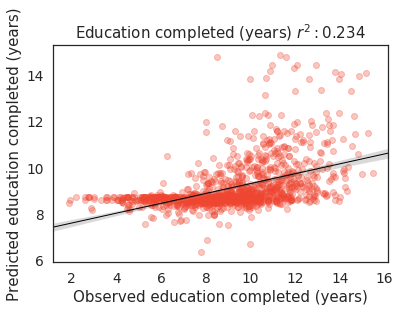

Best estimator: Pipeline(memory=None,
     steps=[('regressor', Lasso(alpha=1.49816047538945, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=42,
   selection='cyclic', tol=0.0001, warm_start=False))])
Socioeconomic indicator: Access to electricity
fit_time : 0.3609
[0.31382775 0.43479133 0.41256952 0.32188416 0.32166696]
train_rmse : 0.1453
[0.15194288 0.14685047 0.14291499 0.14061807 0.14403255]
train_r2 : nan
[1.03298421e-33            nan            nan            nan
 7.90490625e-33]
test_rmse : 0.1447
[0.11575033 0.13925026 0.15474553 0.16312283 0.15052919]
score_time : 0.0017
[0.00218678 0.00146103 0.00180221 0.00170946 0.0013268 ]
test_r2 : nan
[2.02760870e-31 2.63041063e-31            nan            nan
 1.05782576e-31]


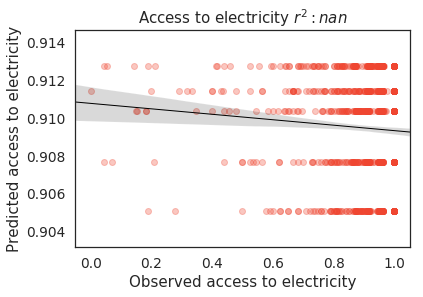

Best estimator: Pipeline(memory=None,
     steps=[('regressor', Lasso(alpha=1.49816047538945, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=True, positive=False, precompute=False, random_state=42,
   selection='cyclic', tol=0.0001, warm_start=False))])
Socioeconomic indicator: Access to water (minutes)
fit_time : 0.3367
[0.31207561 0.30880904 0.41008878 0.33604407 0.31624389]
train_rmse : 8.1018
[6.40582874 8.12836855 8.48800305 8.77278344 8.71386315]
train_r2 : 0.0141
[0.01688645 0.01456267 0.01369873 0.01317846 0.01240355]
test_rmse : 7.6162
[12.97270824  8.23066431  6.6381061   4.91712191  5.32241207]
score_time : 0.0017
[0.00208354 0.00192022 0.0016346  0.00129104 0.0014236 ]
test_r2 : 0.0173
[0.01275113 0.01049172 0.01396336 0.02251026 0.02662994]


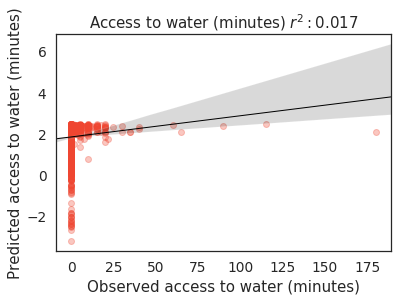

Best estimator: Pipeline(memory=None,
     steps=[('regressor', Lasso(alpha=3.8028572256396647, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=False, positive=False, precompute=False,
   random_state=42, selection='cyclic', tol=0.0001, warm_start=False))])


In [8]:
predictions = model_utils.evaluate_model(
    data=dhs,
    feature_cols=feature_cols, 
    indicator_cols=indicators, 
    scoring=scoring,
    model_type='lasso', 
    refit='r2', 
    search_type='grid', 
    n_splits=5
)

### Ridge Regression

Socioeconomic indicator: Wealth Index
fit_time : 0.5784
[0.61164856 0.65713358 0.70978165 0.60197544 0.31146026]
train_rmse : 58890.5972
[58526.03351829 58875.58710743 59512.93369943 58437.3579941
 59101.07378452]
train_r2 : 0.3106
[0.31250028 0.29842764 0.31757933 0.3131606  0.31144355]
test_rmse : 59484.3481
[60974.85714551 59642.14960594 56973.0716131  61242.56101706
 58589.10109982]
score_time : 0.0017
[0.00194693 0.0015173  0.00161695 0.00183773 0.00142717]
test_r2 : 0.3000
[0.29232286 0.34671091 0.26584429 0.29248766 0.30240878]


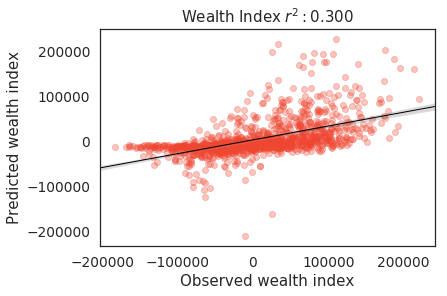

Best estimator: Pipeline(memory=None,
     steps=[('regressor', Ridge(alpha=3.8028572256396647, copy_X=True, fit_intercept=True,
   max_iter=None, normalize=False, random_state=42, solver='auto',
   tol=0.001))])
Socioeconomic indicator: Education completed (years)
fit_time : 0.3226
[0.36839867 0.30900884 0.31012273 0.31274056 0.31282854]
train_rmse : 2.0240
[2.04228231 1.99025689 2.02666174 2.01762914 2.04300165]
train_r2 : 0.2562
[0.25569887 0.25922846 0.26181079 0.25031803 0.25398055]
test_rmse : 2.0385
[1.9682329  2.17273357 2.02645663 2.062654   1.96258109]
score_time : 0.0025
[0.00204802 0.001544   0.00595617 0.00139141 0.00140357]
test_r2 : 0.2461
[0.246128   0.23383306 0.22188045 0.26953804 0.25915972]


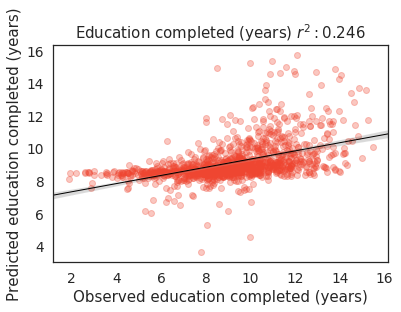

Best estimator: Pipeline(memory=None,
     steps=[('regressor', Ridge(alpha=3.8028572256396647, copy_X=True, fit_intercept=True,
   max_iter=None, normalize=False, random_state=42, solver='auto',
   tol=0.001))])
Socioeconomic indicator: Access to electricity
fit_time : 0.3115
[0.3091054  0.3182528  0.30917811 0.31046581 0.31057954]
train_rmse : 0.1370
[0.14295274 0.13841536 0.13468557 0.13260021 0.13656377]
train_r2 : 0.1100
[0.11483524 0.1115829  0.11185125 0.11078834 0.10102234]
test_rmse : 0.1374
[0.11226983 0.13248824 0.14752428 0.1546364  0.14013851]
score_time : 0.0015
[0.00132227 0.00217605 0.00125957 0.00156689 0.00128007]
test_r2 : 0.1011
[0.0827443  0.09329384 0.09022268 0.10186028 0.13756925]


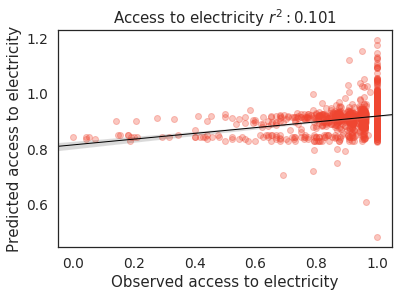

Best estimator: Pipeline(memory=None,
     steps=[('regressor', Ridge(alpha=3.8028572256396647, copy_X=True, fit_intercept=True,
   max_iter=None, normalize=False, random_state=42, solver='auto',
   tol=0.001))])
Socioeconomic indicator: Access to water (minutes)
fit_time : 0.3162
[0.30863261 0.31107688 0.32851815 0.32301092 0.30961752]
train_rmse : 8.0587
[6.38192174 8.09348962 8.42392294 8.71717228 8.6769911 ]
train_r2 : 0.0240
[0.02336213 0.02288637 0.02806719 0.02517608 0.02026343]
test_rmse : 7.6264
[12.91201845  8.19138148  6.75524169  5.01222448  5.26093279]
score_time : 0.0018
[0.00220847 0.00145006 0.00230503 0.00188017 0.00120258]
test_r2 : 0.0233
[0.02649733 0.02005884 0.00532275 0.01495884 0.04970098]


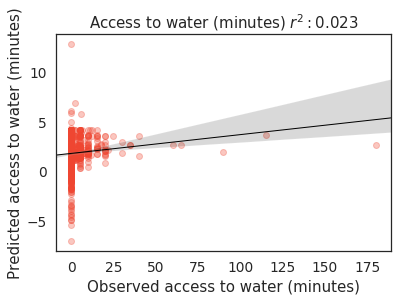

Best estimator: Pipeline(memory=None,
     steps=[('regressor', Ridge(alpha=1.49816047538945, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=42, solver='auto', tol=0.001))])


In [9]:
predictions = model_utils.evaluate_model(
    data=dhs,
    feature_cols=feature_cols, 
    indicator_cols=indicators, 
    scoring=scoring,
    model_type='ridge', 
    refit='r2', 
    search_type='grid', 
    n_splits=5
)